### Práctica Decision Tree

#### Con el mismo set de datos que en el ejemplo, crea un modelo Decision Tree con diferentes hiperparámetros y compara los resultados con el del ejemplo.

In [20]:
import matplotlib.pyplot as plt, numpy as np, pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [21]:
# cargar dats
df = pd.read_csv("ejemplo_dataset.csv")
print(len(df))
# train/test
X = df.drop(columns = 'y')
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y.values.reshape(-1,1), train_size = 0.8, random_state = 1234)

200


In [22]:
# SVC lineal
svc = SVC(C=1, kernel='linear', random_state=123)
svc.fit(X_train, y_train)
# DecissionTree
dtc1 = DecisionTreeClassifier(criterion='gini', max_depth=2, min_samples_split=20, min_samples_leaf=10)
dtc1.fit(X_train, y_train)
# predicciones
pred_svc = svc.predict(X_test)
pred_dtc1 = dtc1.predict(X_test)

c:\Users\eroteta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.5, 1.0, 'Decission Tree')

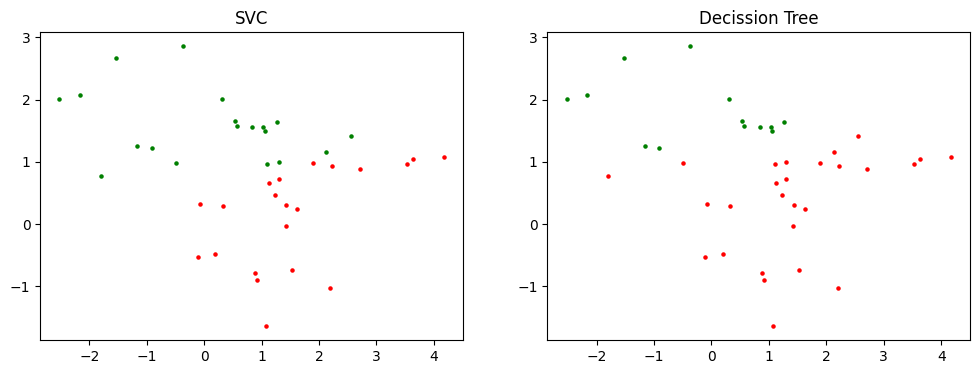

In [23]:
colors = {0: 'red', 1:'green'}
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
for c in np.unique(df.y):
    i = pred_svc==c
    ax[0].scatter(X_test.loc[i, 'X1'], X_test.loc[i, 'X2'], c=colors[c], s=5)
    i = pred_dtc1==c
    ax[1].scatter(X_test.loc[i, 'X1'], X_test.loc[i, 'X2'], c=colors[c], s=5)
ax[0].set_title('SVC')
ax[1].set_title('Decission Tree')

Text(0.5, 1.0, 'Decission Tree 2')

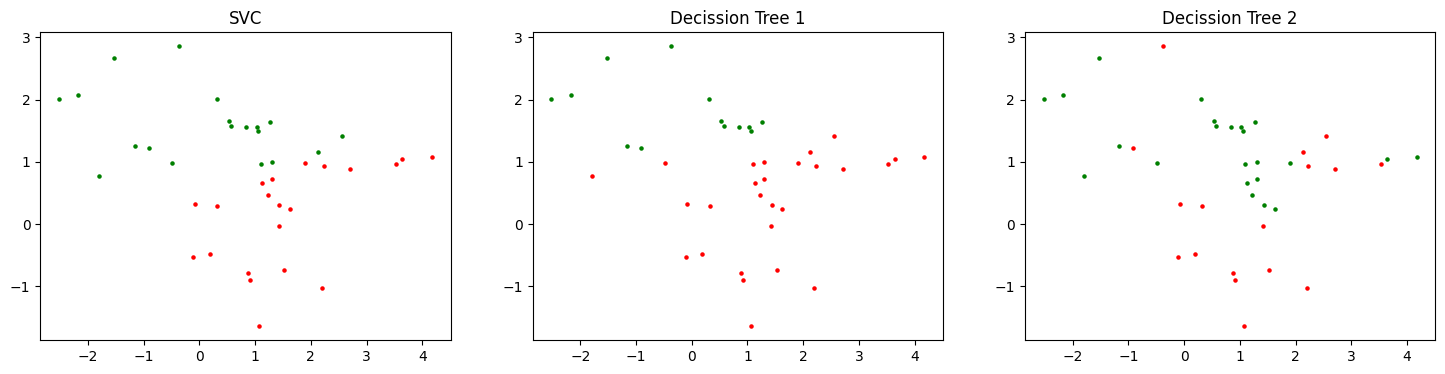

In [24]:
# segundo árbol de decisión
dtc2 = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=5, min_samples_leaf=2)
dtc2.fit(X_train, y_train)
pred_dtc2 = dtc2.predict(X_test)
# visualizar datos
colors = {0: 'red', 1:'green'}
fig, ax = plt.subplots(1, 3, figsize=(18, 4))
for c in np.unique(df.y):
    i = pred_svc==c
    ax[0].scatter(X_test.loc[i, 'X1'], X_test.loc[i, 'X2'], c=colors[c], s=5)
    i = pred_dtc1==c
    ax[1].scatter(X_test.loc[i, 'X1'], X_test.loc[i, 'X2'], c=colors[c], s=5)
    i = pred_dtc2==c
    ax[2].scatter(X_test.loc[i, 'X1'], X_test.loc[i, 'X2'], c=colors[c], s=5)
ax[0].set_title('SVC')
ax[1].set_title('Decission Tree 1')
ax[2].set_title('Decission Tree 2')